In [55]:
#importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [21]:
#loading the data
df=pd.read_csv('cleaned_data.csv')
df

,CustomerID,Month Of Interaction,New/Old Customer,Referral sources,Clothing Section,Journey Stage,Touchpoints,Actions,Outcomes,Sales Campaign,Feedback Rating,Channels,ProductID,Product Name,Product Category,Total Amount (in Rs)
0,1,January,Old Customer,Social Media Influencer,Men,Purchase,Website,Made Purchase,Purchased,Winter Collection,2,Online,1001.0,Tshirt,Topwear,690.0
1,2,January,New Customer,Friends/Family,Men,Awareness,Website,Viewed Product,Continued Browsing,Winter Collection,9,Online,NaN,NaN,NaN,NaN
2,3,January,New Customer,Friends/Family,Men,Purchase,Social Media,Added to Cart,Purchased,Winter Collection,5,Online,1003.0,Shoes,Footwear,3325.0
3,4,January,New Customer,Friends/Family,Men,Purchase,Social Media,Made Purchase,Purchased,New Arrivals,1,Online,1013.0,Pants,Bottomwear,3045.0
4,5,January,Old Customer,Advertisement,Men,Awareness,E-Commerce,Viewed Product,Continued Browsing,Winter Collection,10,Online,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,246,April,Old Customer,Advertisement,Kids,Awareness,Website,Viewed Product,Continued Browsing,New Arrivals,6,Online,NaN,NaN,NaN,NaN
246,247,April,New Customer,Advertisement,Kids,Awareness,Website,Viewed Product,Continued Browsing,Summer Collection,7,Online,NaN,NaN,NaN,NaN
247,248,April,New Customer,Social Media Influencer,Women,Awareness,Social Media,Viewed Product,Continued Browsing,Summer Collection,8,Online,NaN,NaN,NaN,NaN
248,249,April,Old Customer,Advertisement,Women,Consideration,Website,Added to Cart,Continued Browsing,New Arrivals,8,Online,NaN,NaN,NaN,NaN


In [22]:
#checking for null values 
df.isnull().sum()

CustomerID                0
Month Of Interaction      0
New/Old Customer          0
Referral sources          0
Clothing Section          0
Journey Stage             0
Touchpoints               0
Actions                   0
Outcomes                  0
Sales Campaign            0
Feedback Rating           0
Channels                  0
ProductID               135
Product Name            135
Product Category        135
Total Amount (in Rs)    135
dtype: int64

In [23]:
# data cleaning and preprocessing 
df['Total Amount (in Rs)'].fillna(0,inplace=True)
df['ProductID'].fillna(0,inplace=True)
df['Product Category'].fillna(method='ffill',inplace=True)
df['Product Category'].fillna(method='bfill',inplace=True)

In [24]:
df=df.drop(columns=['Product Name'])

In [25]:
# assigning numbers for training to journey stages 
df['Journey_Stage_Number']= pd.factorize(df['Journey Stage'])[0]

#### Journey Stage Numbers For Different Journey Stages 
-  0- Purchase
-  1- Awareness
-  2- Retention
-  3- Advocacy
-  4- Consideration 

In [27]:
df=df.drop(columns=['Journey Stage'])

In [35]:
# checking the datatypes
df.dtypes

CustomerID                                    int64
Feedback Rating                               int64
ProductID                                   float64
Total Amount (in Rs)                        float64
Journey_Stage_Number                          int64
Month Of Interaction_April                    uint8
Month Of Interaction_February                 uint8
Month Of Interaction_January                  uint8
Month Of Interaction_March                    uint8
New/Old Customer_New Customer                 uint8
New/Old Customer_Old Customer                 uint8
Referral sources_Advertisement                uint8
Referral sources_Friends/Family               uint8
Referral sources_Social Media Influencer      uint8
Clothing Section_Kids                         uint8
Clothing Section_Men                          uint8
Clothing Section_Women                        uint8
Touchpoints_E-Commerce                        uint8
Touchpoints_In-Store                          uint8
Touchpoints_

In [36]:
# converting categorical columns to numerical columns
df=pd.get_dummies(df)

In [37]:
df

,CustomerID,Feedback Rating,ProductID,Total Amount (in Rs),Journey_Stage_Number,Month Of Interaction_April,Month Of Interaction_February,Month Of Interaction_January,Month Of Interaction_March,New/Old Customer_New Customer,...,Sales Campaign_End of Season Sale,Sales Campaign_New Arrivals,Sales Campaign_Summer Collection,Sales Campaign_Winter Collection,Channels_In-Person,Channels_Online,Product Category_Accessories,Product Category_Bottomwear,Product Category_Footwear,Product Category_Topwear
0,1,2,1001.0,690.0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,1
1,2,9,0.0,0.0,1,0,0,1,0,1,...,0,0,0,1,0,1,0,0,0,1
2,3,5,1003.0,3325.0,0,0,0,1,0,1,...,0,0,0,1,0,1,0,0,1,0
3,4,1,1013.0,3045.0,0,0,0,1,0,1,...,0,1,0,0,0,1,0,1,0,0
4,5,10,0.0,0.0,1,0,0,1,0,0,...,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,246,6,0.0,0.0,1,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
246,247,7,0.0,0.0,1,1,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0
247,248,8,0.0,0.0,1,1,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0
248,249,8,0.0,0.0,4,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [38]:
df.columns

Index(['CustomerID', 'Feedback Rating', 'ProductID', 'Total Amount (in Rs)',
       'Journey_Stage_Number', 'Month Of Interaction_April',
       'Month Of Interaction_February', 'Month Of Interaction_January',
       'Month Of Interaction_March', 'New/Old Customer_New Customer',
       'New/Old Customer_Old Customer', 'Referral sources_Advertisement',
       'Referral sources_Friends/Family',
       'Referral sources_Social Media Influencer', 'Clothing Section_Kids',
       'Clothing Section_Men', 'Clothing Section_Women',
       'Touchpoints_E-Commerce', 'Touchpoints_In-Store',
       'Touchpoints_Social Media', 'Touchpoints_Website',
       'Actions_Added to Cart', 'Actions_Gave Referral',
       'Actions_Made Purchase', 'Actions_Posted Review',
       'Actions_Viewed Product', 'Outcomes_Cart Abandoned',
       'Outcomes_Continued Browsing', 'Outcomes_Purchased',
       'Outcomes_Referral Made', 'Outcomes_Review Posted',
       'Sales Campaign_End of Season Sale', 'Sales Campaign_New

In [39]:
X=df[['Feedback Rating','Total Amount (in Rs)',
       'Month Of Interaction_April',
       'Month Of Interaction_February', 'Month Of Interaction_January',
       'Month Of Interaction_March', 'New/Old Customer_New Customer',
       'New/Old Customer_Old Customer', 'Referral sources_Advertisement',
       'Referral sources_Friends/Family',
       'Referral sources_Social Media Influencer', 'Clothing Section_Kids',
       'Clothing Section_Men', 'Clothing Section_Women',
       'Touchpoints_E-Commerce', 'Touchpoints_In-Store',
       'Touchpoints_Social Media', 'Touchpoints_Website',
       'Actions_Added to Cart', 'Actions_Gave Referral',
       'Actions_Made Purchase', 'Actions_Posted Review',
       'Actions_Viewed Product', 'Outcomes_Cart Abandoned',
       'Outcomes_Continued Browsing', 'Outcomes_Purchased',
       'Outcomes_Referral Made', 'Outcomes_Review Posted',
       'Sales Campaign_End of Season Sale', 'Sales Campaign_New Arrivals',
       'Sales Campaign_Summer Collection', 'Sales Campaign_Winter Collection',
       'Channels_In-Person', 'Channels_Online', 'Product Category_Accessories',
       'Product Category_Bottomwear', 'Product Category_Footwear',
       'Product Category_Topwear']]
y=df['Journey_Stage_Number']#target variable

In [40]:
# splitting the data into test and training data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [42]:
#training with logistic regression 
model=LogisticRegression()

In [43]:
#fitting the training data 
model.fit(X_train,y_train)

C:\Users\Aakriti\anaconda3\anaconda2\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
predictions=model.predict(X_test)

In [47]:
#testing the accuracy of model 
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.92


In [52]:
#getting classification report 
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.81      1.00      0.90        26
           2       1.00      0.91      0.95        11
           3       1.00      1.00      1.00         3
           4       1.00      0.74      0.85        19

    accuracy                           0.92        75
   macro avg       0.96      0.93      0.94        75
weighted avg       0.94      0.92      0.92        75



In [53]:
#making confusion matrix
conf_matrix=confusion_matrix(y_test,predictions)
print(conf_matrix)

[[16  0  0  0  0]
 [ 0 26  0  0  0]
 [ 0  1 10  0  0]
 [ 0  0  0  3  0]
 [ 0  5  0  0 14]]


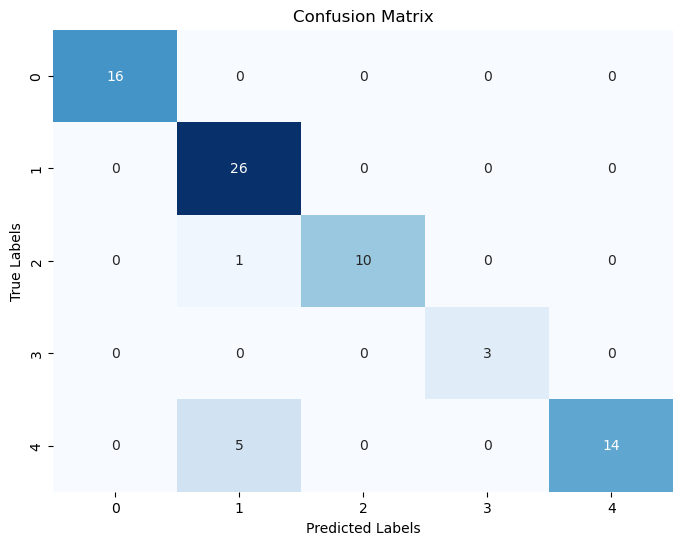

In [58]:
#plotting the confusion matrix 
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [59]:
#testing the predictions for new data
new_data = pd.DataFrame({'Feedback Rating':[8],'Total Amount (in Rs)':[1035], 
'Month Of Interaction_April':[1],'Month Of Interaction_February':[0], 'Month Of Interaction_January':[0],
'Month Of Interaction_March':[0], 'New/Old Customer_New Customer':[1], 'New/Old Customer_Old Customer':[0], 
'Referral sources_Advertisement':[0],'Referral sources_Friends/Family':[0],'Referral sources_Social Media Influencer':[1], 
'Clothing Section_Kids':[0],'Clothing Section_Men':[1], 'Clothing Section_Women':[0],'Touchpoints_E-Commerce':[0],
'Touchpoints_In-Store':[0], 'Touchpoints_Social Media':[1], 'Touchpoints_Website':[0],'Actions_Added to Cart':[0], 
'Actions_Gave Referral':[0],'Actions_Made Purchase':[1], 'Actions_Posted Review':[0],'Actions_Viewed Product':[0], 
'Outcomes_Cart Abandoned':[0],'Outcomes_Continued Browsing':[0], 'Outcomes_Purchased':[1],'Outcomes_Referral Made':[0], 
'Outcomes_Review Posted':[0],'Sales Campaign_End of Season Sale':[0], 'Sales Campaign_New Arrivals':[0],
'Sales Campaign_Summer Collection':[1], 'Sales Campaign_Winter Collection':[0],'Channels_In-Person':[0], 
'Channels_Online':[1], 'Product Category_Accessories':[0],'Product Category_Bottomwear':[0], 'Product Category_Footwear':[1],
'Product Category_Topwear':[1]})

In [60]:
new_data

,Feedback Rating,Total Amount (in Rs),Month Of Interaction_April,Month Of Interaction_February,Month Of Interaction_January,Month Of Interaction_March,New/Old Customer_New Customer,New/Old Customer_Old Customer,Referral sources_Advertisement,Referral sources_Friends/Family,...,Sales Campaign_End of Season Sale,Sales Campaign_New Arrivals,Sales Campaign_Summer Collection,Sales Campaign_Winter Collection,Channels_In-Person,Channels_Online,Product Category_Accessories,Product Category_Bottomwear,Product Category_Footwear,Product Category_Topwear
0,8,1035,1,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,1


In [61]:
model.predict(new_data)

array([0], dtype=int64)